# <center>Bài tập: So sánh hai vector trung bình</center>
## Bài toán so sánh hai vector trung bình
* Trong bài toán kiểm định giả thuyết so sánh hai vector trung bình, ta có hai mẫu ngẫu nhiên $\boldsymbol{x}_{11},\ldots,\boldsymbol{x}_{1n_1}$ và $\boldsymbol{x}_{21},\ldots,\boldsymbol{x}_{2n_2}$. Hai mẫu này được lấy từ hai tập nền tương ứng có phân phối chuẩn d-chiều $\boldsymbol{X}_1 \sim \mathcal{N}_d(\boldsymbol{\mu}_1, \Sigma_1)$ và $\boldsymbol{X}_2 \sim \mathcal{N}_d(\boldsymbol{\mu}_2, \Sigma_2)$, và ta có thêm giả thiết hai ma trận hiệp phương sai bằng nhau $\Sigma_1 = \Sigma_2 = \Sigma$.
* Bài toán đặt ra là ta cần so sánh hai vector kì vọng $\boldsymbol{\mu}_1$ và $\boldsymbol{\mu}_2$. Như vậy, giả thuyết gốc là $H_0: \boldsymbol{\mu}_1 = \boldsymbol{\mu}_2$ và đối thuyết $H_1: \boldsymbol{\mu}_1 \neq \boldsymbol{\mu}_2$.
* Gọi $\overline{\boldsymbol{x}}_i = \dfrac{1}{n_i} \sum_{j=1}^{n_i} \boldsymbol{x}_{ij}$ và $\boldsymbol{S}_i = \dfrac{1}{n_i - 1} \sum_{j=1}^{n_i} (\boldsymbol{x}_{ij} - \overline{\boldsymbol{x}}_i)(\boldsymbol{x}_{ij} - \overline{\boldsymbol{x}}_i)^T$ lần lượt là vector trung bình mẫu và ma trận hiệp phương sai mẫu của mẫu thứ $i$ ($i=1,2$). Xét tiêu chuẩn:
$$T^2 = [\overline{\boldsymbol{x}}_1 - \overline{\boldsymbol{x}}_2 - (\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)]^T \bigg[ \bigg( \dfrac{1}{n_1} + \dfrac{1}{n_2} \bigg) \boldsymbol{S} \bigg]^{-1} [\overline{\boldsymbol{x}}_1 - \overline{\boldsymbol{x}}_2 - (\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)] $$
ở đó, $\boldsymbol{S} = \dfrac{1}{n_1 + n_2 - 2}[(n_1 - 1)\boldsymbol{S}_1 + (n_2 - 1)\boldsymbol{S}_2]$ là hiệp phương sai chung của hai mẫu.
* Khi giả thuyết $H_0: \boldsymbol{\mu}_1 = \boldsymbol{\mu}_2$ đúng, thống kê $T^2$ ở trên tuân theo phân phối
$$ T^2 \sim \dfrac{(n_1 + n_2 - 2)d}{n_1 + n_2 - d - 1} F_{d;n_1 + n_2 - d - 1} $$

## Ví dụ: so sánh kích thước mai rùa
* Kích thước mai rùa được đặc trưng bởi $d=3$ yếu tố: chiều dài, chiều rộng, chiều cao (mm).
* Bộ dữ liệu gồm có 2 tập mẫu: dữ liệu kích thước mai rùa của $n_1 = 24$ con rùa cái và dữ liệu kích thước mai rùa của $n_2 = 24$ con rùa đực. 

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
female = pd.read_csv("female.csv")
male = pd.read_csv("male.csv")

* Dữ liệu về kích thước mai rùa của 24 con rùa cái:

In [129]:
female

,Length,Width,Height
0,98,81,38
1,103,84,38
2,103,86,42
3,105,86,42
4,109,88,44
5,123,92,50
6,123,95,46
7,133,99,51
8,133,101,51
9,133,102,51


* Dữ liệu về kích thước mai rùa của 24 con rùa đực:

In [130]:
male

,Length,Width,Height
0,93,74,37
1,94,78,35
2,96,80,35
3,101,84,39
4,102,85,38
5,103,81,37
6,104,83,39
7,106,83,39
8,107,82,38
9,112,89,40


* Số chiều $d$:

In [134]:
d = female.shape[1]
print("d = %i" % d)

d = 3


* Kích thước mẫu thứ nhất $n_1$:

In [136]:
n_female = female.shape[0]
print("n_1 = %i" % n_female)

n_1 = 24


* Kích thước mẫu thứ hai $n_2$:

In [137]:
n_male = male.shape[0]
print("n_2 = %i" % n_male)

n_2 = 24


* Trung bình mẫu thứ nhất $\overline{\boldsymbol{x}}_1$:

In [140]:
female_mean = female.mean().values.reshape(-1,1)
print(female_mean)

[[ 136.04166667]
 [ 102.54166667]
 [  52.04166667]]


* Trung bình mẫu thứ hai $\overline{\boldsymbol{x}}_2$:

In [141]:
male_mean = male.mean().values.reshape(-1,1)
print(male_mean)

[[ 113.375     ]
 [  88.29166667]
 [  40.70833333]]


* Ma trận hiệp phương sai mẫu thứ nhất $\boldsymbol{S}_1$:

In [142]:
female_cov = female.cov().values
female.cov()

,Length,Width,Height
Length,451.519928,271.106884,165.954710
Width,271.106884,171.824275,101.889493
Height,165.954710,101.889493,64.737319


* Ma trận hiệp phương sai mẫu thứ hai $\boldsymbol{S}_2$:

In [143]:
male_cov = male.cov().values
male.cov()

,Length,Width,Height
Length,138.766304,79.146739,37.375000
Width,79.146739,50.041667,21.653986
Height,37.375000,21.653986,11.259058


* Biểu đồ biểu diễn các điểm dữ liệu trong bộ dữ liệu:

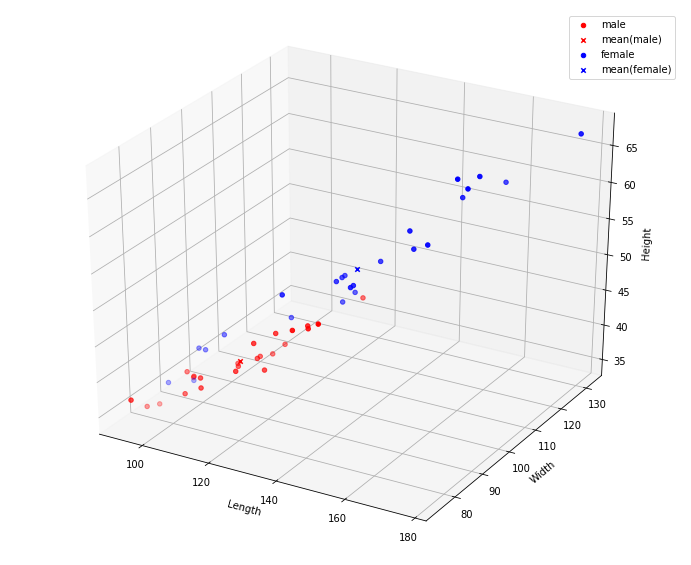

In [102]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(male.Length,male.Width,male.Height,c='red',label='male')
ax.scatter3D(male.mean().Length,male.mean().Width,male.mean().Height,c='red',marker='x',label='mean(male)')
ax.scatter3D(female.Length,female.Width,female.Height,c='blue',label='female')
ax.scatter3D(female.mean().Length,female.mean().Width,female.mean().Height,c='blue',marker='x',label='mean(female)')
ax.set_xlabel('Length')
ax.set_ylabel('Width')
ax.set_zlabel('Height')
ax.legend()
plt.show()

* Phân phối Fisher: biến ngẫu nhiên $X$ tuân theo phân phối Fisher với các tham số $d_1$ và $d_2$, kí hiệu là $X \sim F_{d_1;d_2}$. Hàm mật độ của phân phối Fisher:
$$ f(x; d_1,d_2) = \dfrac{\sqrt{\dfrac{(d_1 x)^{d_1}(d_2)^{d_2}}{(d_1 x + d_2)^{d_1 + d_2}}}}{x B\bigg( \dfrac{d_1}{2}, \dfrac{d_2}{2} \bigg)}, \quad x \geq 0 $$
trong đó, $B(x,y)$ là hàm beta:
$$B(x,y) = \int_0^1 t^{x-1} (1-t)^{y-1} dt$$
* $T^2 \sim \dfrac{(n_1 + n_2 - 2)d}{n_1 + n_2 - d - 1} F_{d;n_1 + n_2 - d - 1}$. Cụ thể, ta có $n_1 = 24, n_2 = 24, d = 3$ nên $T^2 \sim \dfrac{138}{44} F_{3;44}$.
* Dưới đây là đồ thị hàm mật độ xác suất của $T^2$: 

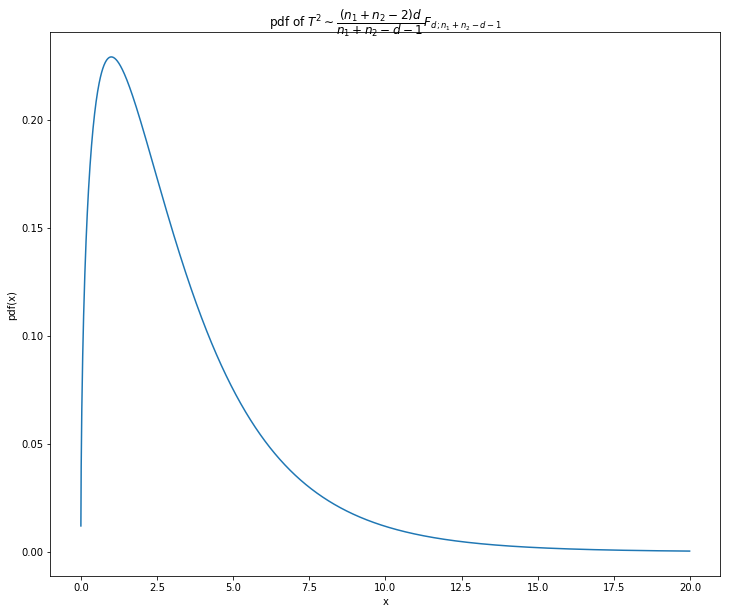

In [152]:
d1 = d
d2 = n_male + n_female - d - 1
rv = stats.f(dfn=d1,dfd=d2,scale=(d1 + d2 - 1) * d1 / d2)
x = np.arange(0.001,20,0.01)
plt.figure(figsize=(12,10))
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.title(r'pdf of $T^2 \sim \dfrac{(n_1 + n_2 - 2)d}{n_1 + n_2 - d - 1} F_{d;n_1 + n_2 - d - 1}$')
plt.plot(x, rv.pdf(x))
plt.show()

* Kiểm định giả thuyết: 
    * Do đối thuyết $H_1: \boldsymbol{\mu}_1 \neq \boldsymbol{\mu}_2$ nên miền tới hạn là hai phía.
    * Mức ý nghĩa $\alpha = 0.05$.
    * Giá trị tới hạn trái: $T^2_{\alpha / 2}$ thỏa mãn 
    $$P(T^2 < T^2_{\alpha / 2}) = \dfrac{\alpha}{2}$$
    hay 
    $$T^2_{\alpha / 2} = Q(\dfrac{\alpha}{2}).$$
    $Q(x) = F^{-1}(x)$ là hàm ngược của hàm phân phối tích lũy, được gọi là hàm phân vị (quantile/percent-point function).
    * Giá trị tới hạn phải: $T^2_{1 - \alpha / 2}$ thỏa mãn 
    $$P(T^2 > T^2_{1 - \alpha / 2}) = \dfrac{\alpha}{2}$$
    hay 
    $$T^2_{\alpha / 2} = S^{-1}(\dfrac{\alpha}{2}).$$
    $S(x) = 1 - F(x)$ được gọi là hàm sinh tồn (survival function).
    * Miền tới hạn: $B_{\alpha} = (0, T^2_{\alpha / 2}) \cup (T^2_{1 - \alpha / 2}, +\infty)$

In [15]:
def hypothesis_testing(sample_mean1, sample_mean2, sample_cov1, sample_cov2, n1, n2, d, alpha = 0.05):
    common_sample_cov = ((n1 - 1) * sample_cov1 + (n2 - 1) * sample_cov2) / (n1 + n2 - 2)
    statistic = (sample_mean1 - sample_mean2).T @ np.linalg.inv((1 / n1 + 1 / n2) * common_sample_cov) @ (sample_mean1 - sample_mean2)
    statistic = np.asscalar(statistic)
    
    d1 = d
    d2 = n1 + n2 - d - 1
    rv = stats.f(dfn=d1,dfd=d2,scale=(d1 + d2 - 1) * d1 / d2)
    
    critical_value_lower = rv.ppf(alpha / 2)
    critical_value_upper = rv.isf(alpha / 2)
    return (statistic,critical_value_lower,critical_value_upper)

* Với mức ý nghĩa $\alpha = 0.05$:

In [ ]:
statistic,critical_value_lower,critical_value_upper = hypothesis_testing(female_mean, male_mean, female_cov, male_cov, n_female, n_male, d)

* Giá trị tới hạn trái $T^2_{\alpha / 2}$

In [158]:
print("lower critical value: %f" % critical_value_lower)

lower critical value: 0.223636


* Giá trị tới hạn phải $T^2_{1 - \alpha / 2}$

In [159]:
print("upper critical value: %f " % critical_value_upper)

upper critical value: 10.757131 


* Đồ thị biểu diễn các giá trị tới hạn trái, giá trị tới hạn phải, miền tới hạn:

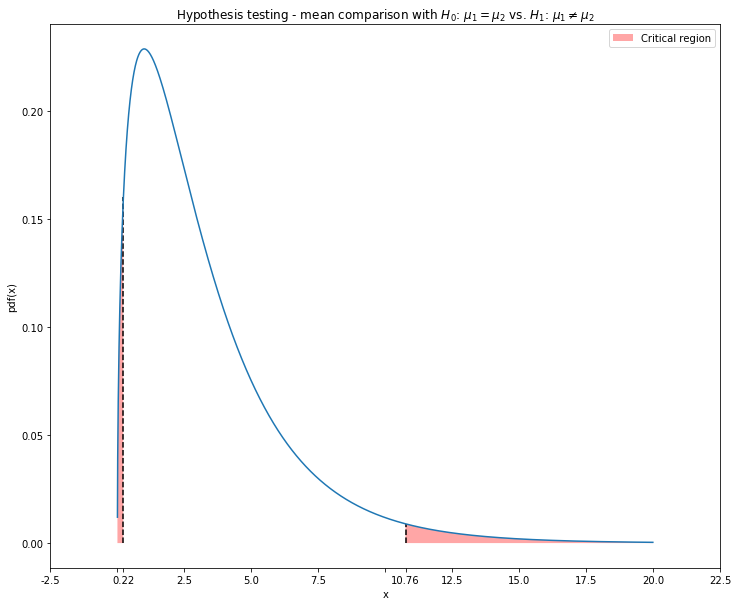

In [126]:
plt.figure(figsize=(12,10))
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.title(r'Hypothesis testing - mean comparison with $H_0$: $\mu_1 = \mu_2$ vs. $H_1$: $\mu_1 \neq \mu_2$')

x = np.arange(0.001,critical_value_lower,0.01)
plt.fill_between(x, rv.pdf(x) ,facecolor='red', alpha=0.35, label = 'Critical region')
plt.vlines(critical_value_lower,0,rv.pdf(critical_value_lower),linestyles='--')
x = np.arange(critical_value_lower,critical_value_upper,0.01)
plt.fill_between(x, rv.pdf(x) ,facecolor='white', alpha=0.35)
x = np.arange(critical_value_upper,20,0.01)
plt.fill_between(x, rv.pdf(x) ,facecolor='red', alpha=0.35)
plt.vlines(critical_value_upper,0,rv.pdf(critical_value_upper),linestyles='--')
x = np.arange(0.001,20,0.01)
plt.plot(x, rv.pdf(x))

xticks_locs = list(plt.xticks()[0]) + [round(critical_value_lower,2), round(critical_value_upper,2)]
xticks_locs.sort()
xticks_labels = list(xticks_locs)
xticks_labels[1] = ''
xticks_labels[6] = ''
xticks_labels = tuple(xticks_labels)
plt.xticks(xticks_locs, xticks_labels)
plt.legend()
plt.show()

* Giá trị quan sát được của $T^2$

In [160]:
print("observed T^2 statistic value: %f" % statistic)

observed T^2 statistic value: 72.546342


* Giá trị quan sát được của $T^2$ nằm trong miền bác bỏ $B_{\alpha}$. Như vậy, với mức ý nghĩa $\alpha = 0.05$, ta bác bỏ giả thuyết $H_0: \boldsymbol{\mu}_1 = \boldsymbol{\mu}_2$.